In [2]:
import pandas as pd
import numpy as np


In [3]:
df1=pd.read_csv('./strava_rides_clear.csv')
# print columns where average_heart_rate is not null
df1.columns

Index(['Unnamed: 0', 'average_speed', 'max_speed', 'average_heartrate',
       'max_heartrate', 'distance', 'elapsed_time', 'moving_time',
       'total_elevation_gain', 'elev_high', 'type', 'start_date_local',
       'kudos_count', 'name', 'sport_type', 'achievement_count',
       'average_watts', 'weighted_average_watts', 'kilojoules', 'pr_count',
       'average_cadence', 'date', 'time', 'time_bins'],
      dtype='object')

In [4]:
df2=pd.read_csv('./strava_data_ridesOnly.csv')
# print columns where average_heart_rate is not null
df2.columns

Index(['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'sport_type', 'achievement_count',
       'average_speed', 'average_watts', 'weighted_average_watts',
       'kilojoules', 'average_heartrate', 'pr_count', 'average_cadence',
       'date', 'time', 'time_bins'],
      dtype='object')

In [5]:
df1c=list(df1.columns)
df2c=list(df2.columns)

common_columns = list(set(df1c).intersection(df2c))
print(common_columns)

['average_speed', 'average_heartrate', 'elapsed_time', 'pr_count', 'moving_time', 'kilojoules', 'total_elevation_gain', 'time', 'average_watts', 'achievement_count', 'weighted_average_watts', 'average_cadence', 'sport_type', 'name', 'distance', 'date', 'time_bins']


In [6]:
df1=df1[common_columns]
df2=df2[common_columns]

merged_df = pd.concat([df1,df2], ignore_index=True)

In [7]:
merged_df

,average_speed,average_heartrate,elapsed_time,pr_count,moving_time,kilojoules,total_elevation_gain,time,average_watts,achievement_count,weighted_average_watts,average_cadence,sport_type,name,distance,date,time_bins
0,17.81,156.6,189.27,30.0,168.63,1537.5,3412.07,6.0,152.0,87.0,167.0,88.3,Ride,bikini,50.05,2023-08-19 06:29:26,4am-8am
1,9.76,115.9,13.15,0.0,13.15,31.5,62.34,19.0,40.0,0.0,NaN,NaN,Ride,Evening Ride,2.14,2023-08-13 19:39:30,4pm-8pm
2,13.42,148.3,1.47,0.0,1.47,5.5,3.28,10.0,63.0,0.0,59.0,69.2,Ride,Morning Ride,0.33,2023-08-12 10:21:07,8am-12pm
3,18.98,154.5,169.27,9.0,158.72,1366.5,1325.46,7.0,143.5,17.0,160.0,89.8,Ride,shift in the force,50.21,2023-08-12 07:31:32,4am-8am
4,18.24,151.6,181.98,20.0,156.75,1475.5,2368.77,7.0,156.9,33.0,177.0,88.3,Ride,Fresh Daily,47.66,2023-08-05 07:00:43,4am-8am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.23,NaN,128.10,0.0,92.25,207.2,856.30,8.0,37.4,6.0,NaN,56.6,Ride,Morning Ride,8.04,2017-05-06 08:49:09,4am-8am
1036,10.15,NaN,45.02,0.0,42.80,109.4,177.17,6.0,42.6,1.0,NaN,NaN,Ride,Morning Ride,7.24,2017-04-30 06:50:08,4am-8am
1037,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,NaN,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am
1038,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,NaN,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am


In [8]:
#drop columns witch have more than 50% of null values
df_not_null = merged_df.dropna(thresh=merged_df.shape[0]*0.5,axis=1)
df_not_null

,average_speed,average_heartrate,elapsed_time,pr_count,moving_time,kilojoules,total_elevation_gain,time,average_watts,achievement_count,weighted_average_watts,average_cadence,sport_type,name,distance,date,time_bins
0,17.81,156.6,189.27,30.0,168.63,1537.5,3412.07,6.0,152.0,87.0,167.0,88.3,Ride,bikini,50.05,2023-08-19 06:29:26,4am-8am
1,9.76,115.9,13.15,0.0,13.15,31.5,62.34,19.0,40.0,0.0,NaN,NaN,Ride,Evening Ride,2.14,2023-08-13 19:39:30,4pm-8pm
2,13.42,148.3,1.47,0.0,1.47,5.5,3.28,10.0,63.0,0.0,59.0,69.2,Ride,Morning Ride,0.33,2023-08-12 10:21:07,8am-12pm
3,18.98,154.5,169.27,9.0,158.72,1366.5,1325.46,7.0,143.5,17.0,160.0,89.8,Ride,shift in the force,50.21,2023-08-12 07:31:32,4am-8am
4,18.24,151.6,181.98,20.0,156.75,1475.5,2368.77,7.0,156.9,33.0,177.0,88.3,Ride,Fresh Daily,47.66,2023-08-05 07:00:43,4am-8am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.23,NaN,128.10,0.0,92.25,207.2,856.30,8.0,37.4,6.0,NaN,56.6,Ride,Morning Ride,8.04,2017-05-06 08:49:09,4am-8am
1036,10.15,NaN,45.02,0.0,42.80,109.4,177.17,6.0,42.6,1.0,NaN,NaN,Ride,Morning Ride,7.24,2017-04-30 06:50:08,4am-8am
1037,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,NaN,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am
1038,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,NaN,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am


In [9]:
#fill int values with mean, float values with median, string values with none
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col].fillna(df[col].mean(), inplace=True)
        elif df[col].dtype == 'float64':
            df[col].fillna(df[col].median(), inplace=True)
    return df

In [10]:
df_not_null = fill_missing_values(df_not_null)
df_not_null

C:\Users\paulp\AppData\Local\Temp\ipykernel_87164\2314114023.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\paulp\AppData\Local\Temp\ipykernel_87164\2314114023.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,average_speed,average_heartrate,elapsed_time,pr_count,moving_time,kilojoules,total_elevation_gain,time,average_watts,achievement_count,weighted_average_watts,average_cadence,sport_type,name,distance,date,time_bins
0,17.81,156.6,189.27,30.0,168.63,1537.5,3412.07,6.0,152.0,87.0,167.0,88.3,Ride,bikini,50.05,2023-08-19 06:29:26,4am-8am
1,9.76,115.9,13.15,0.0,13.15,31.5,62.34,19.0,40.0,0.0,152.0,90.1,Ride,Evening Ride,2.14,2023-08-13 19:39:30,4pm-8pm
2,13.42,148.3,1.47,0.0,1.47,5.5,3.28,10.0,63.0,0.0,59.0,69.2,Ride,Morning Ride,0.33,2023-08-12 10:21:07,8am-12pm
3,18.98,154.5,169.27,9.0,158.72,1366.5,1325.46,7.0,143.5,17.0,160.0,89.8,Ride,shift in the force,50.21,2023-08-12 07:31:32,4am-8am
4,18.24,151.6,181.98,20.0,156.75,1475.5,2368.77,7.0,156.9,33.0,177.0,88.3,Ride,Fresh Daily,47.66,2023-08-05 07:00:43,4am-8am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.23,129.6,128.10,0.0,92.25,207.2,856.30,8.0,37.4,6.0,152.0,56.6,Ride,Morning Ride,8.04,2017-05-06 08:49:09,4am-8am
1036,10.15,129.6,45.02,0.0,42.80,109.4,177.17,6.0,42.6,1.0,152.0,90.1,Ride,Morning Ride,7.24,2017-04-30 06:50:08,4am-8am
1037,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,152.0,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am
1038,9.78,119.6,93.07,0.0,79.93,187.3,291.99,7.0,39.1,0.0,152.0,61.2,Ride,Morning Ride,13.03,2017-04-28 07:02:53,4am-8am


In [11]:
df_not_null.dtypes

average_speed             float64
average_heartrate         float64
elapsed_time              float64
pr_count                  float64
moving_time               float64
kilojoules                float64
total_elevation_gain      float64
time                      float64
average_watts             float64
achievement_count         float64
weighted_average_watts    float64
average_cadence           float64
sport_type                 object
name                       object
distance                  float64
date                       object
time_bins                  object
dtype: object

In [12]:
#print columns with NaN values
df_not_null.columns[df_not_null.isna().any()].tolist()

df_not_null.to_csv('dataset.csv', index=False)


In [13]:
dff = pd.read_csv('dataset.csv')
df_backup = dff.copy()
print(df_backup.head())

   average_speed  average_heartrate  elapsed_time  pr_count  moving_time  \
0          17.81              156.6        189.27      30.0       168.63   
1           9.76              115.9         13.15       0.0        13.15   
2          13.42              148.3          1.47       0.0         1.47   
3          18.98              154.5        169.27       9.0       158.72   
4          18.24              151.6        181.98      20.0       156.75   

   kilojoules  total_elevation_gain  time  average_watts  achievement_count  \
0      1537.5               3412.07   6.0          152.0               87.0   
1        31.5                 62.34  19.0           40.0                0.0   
2         5.5                  3.28  10.0           63.0                0.0   
3      1366.5               1325.46   7.0          143.5               17.0   
4      1475.5               2368.77   7.0          156.9               33.0   

   weighted_average_watts  average_cadence sport_type               

In [14]:

def calculate_health_score_df(df, rider_weight=70, healthy_heart_rate_threshold=150):
    df['normalized_kilojoules'] = df['kilojoules'] / rider_weight

    df['heart_rate_penalty'] = df['average_heartrate'] - healthy_heart_rate_threshold
    df['heart_rate_penalty'] = df['heart_rate_penalty'].clip(lower=0)  # Ensure penalty is non-negative

    df['health_score'] = (df['normalized_kilojoules'] * 0.6) - (df['heart_rate_penalty'] * 0.4)

    df['health_score'] = df['health_score'].apply(lambda x: min(max(x, 0), 1))

    df.drop(['normalized_kilojoules', 'heart_rate_penalty'], axis=1, inplace=True)

    return df


# df = calculate_health_score_df(dff)
# print(df['health_score'].head(15))


cadence_bonus_threshold = 80

def calculate_efficiency_score(row, cadence_bonus_threshold):
  efficiency_base = row['average_speed'] * row['distance']
  normalized_power = row['average_watts'] / row['moving_time']
  time_penalty = (row['elapsed_time'] - row['moving_time']) / row['elapsed_time']

  cadence_bonus = 0
  if row['average_cadence'] > cadence_bonus_threshold:
    cadence_bonus = (row['average_cadence'] - cadence_bonus_threshold) / 100

  efficiency_score = (efficiency_base * 0.7) + (normalized_power * 0.2) - (time_penalty * 0.1) + cadence_bonus
  return efficiency_score

dff['efficiency_score'] = dff.apply(calculate_efficiency_score, axis=1, args=(cadence_bonus_threshold,))

efficiency_threshold = 200

dff['efficiency_code'] = (dff['efficiency_score'] > efficiency_threshold).astype(int)

print(dff[['efficiency_score', 'efficiency_code']].head(20))


# Print the first 20 efficiency scores
# print(dff['efficiency_score'].head(20))





    efficiency_score  efficiency_code
0         624.225721                1
1          15.329845                0
2          11.671449                0
3         667.362649                1
4         608.792207                1
5          22.952458                0
6         537.243558                1
7          68.194479                0
8          24.929605                0
9          24.848656                0
10        568.377198                1
11        428.453807                1
12        414.920949                1
13         22.397804                0
14         24.258953                0
15        564.468808                1
16         41.602239                0
17        814.550336                1
18         33.057541                0
19        568.416662                1


In [15]:
#drop UNNECESSARY COLUMNS

#df_backup = df_backup.drop(["pr_count", "achievement_count", "name", "sport_type" ,"time_bins", "date"], axis=1)
#df_backup = df_backup.drop(["time"], axis=1)

#print(df_backup.select_dtypes(include=np.number).corr())
print(df_backup.head())




   average_speed  average_heartrate  elapsed_time  pr_count  moving_time  \
0          17.81              156.6        189.27      30.0       168.63   
1           9.76              115.9         13.15       0.0        13.15   
2          13.42              148.3          1.47       0.0         1.47   
3          18.98              154.5        169.27       9.0       158.72   
4          18.24              151.6        181.98      20.0       156.75   

   kilojoules  total_elevation_gain  time  average_watts  achievement_count  \
0      1537.5               3412.07   6.0          152.0               87.0   
1        31.5                 62.34  19.0           40.0                0.0   
2         5.5                  3.28  10.0           63.0                0.0   
3      1366.5               1325.46   7.0          143.5               17.0   
4      1475.5               2368.77   7.0          156.9               33.0   

   weighted_average_watts  average_cadence sport_type               

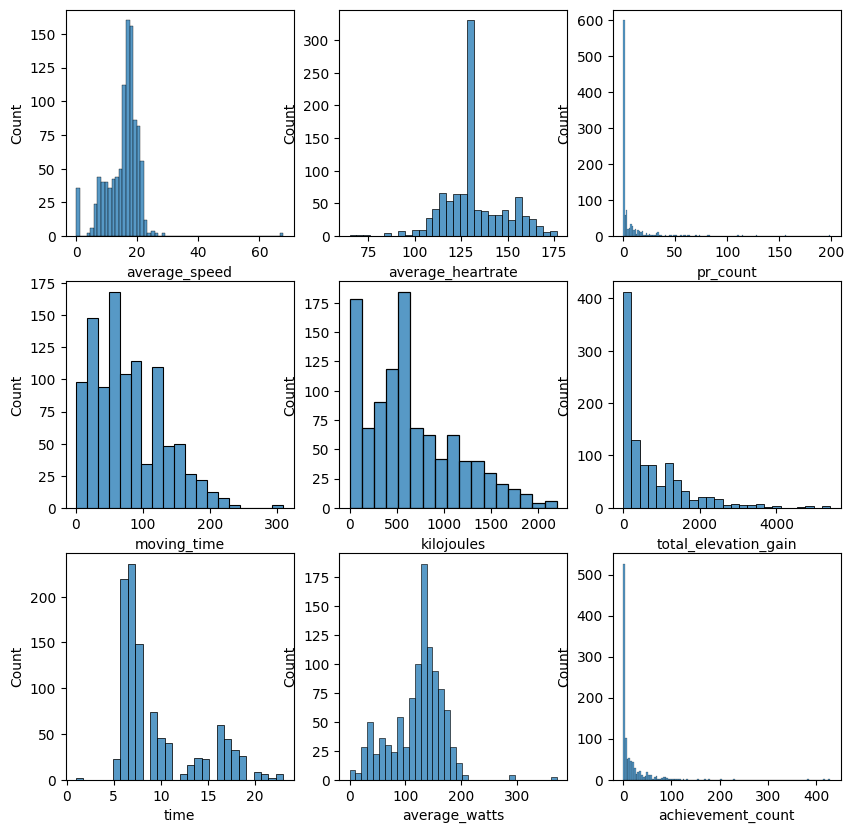

In [16]:
# from sklearn.preprocessing import StandardScaler

# import seaborn as sns
# # Create a StandardScaler object
# scaler = StandardScaler()

# # Standardize the dataset
# df_backup_standardized = scaler.fit_transform(df_backup)


# df_backup_standardized = pd.DataFrame(df_backup_standardized, columns=df_backup.columns)
# print(df_backup_standardized.head())

##  SCALING ABOVE  ##
df_without_elapsed_time = df_backup.drop(['elapsed_time'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot
fig, ax = plt.subplots(3,3, figsize=(10,10))

flat_ax = ax.flatten()

for i, ax in enumerate(flat_ax):
    sns.histplot(data=df_without_elapsed_time[df_without_elapsed_time.columns[i]], ax=ax)
plt.show()

d:\LICENTA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\paulp\AppData\Local\Temp\ipykernel_87164\3532258969.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\LICENTA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\paulp\AppData\Local\Temp\ipykernel_87164\3532258969.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


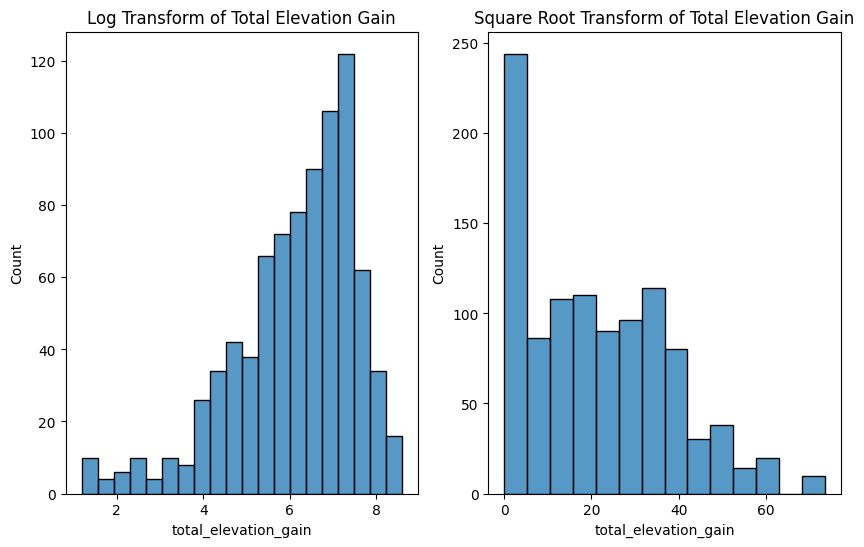

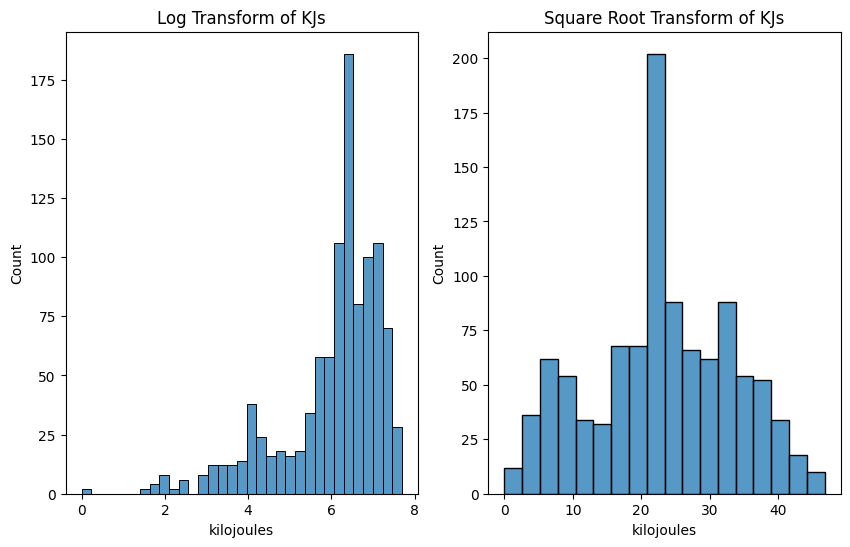

In [17]:
#we will try a Log Transformation on total_elevation_gain and kilojoules to fix their skews
fig, ax = plt.subplots(1, 2, figsize=(10,6))
import seaborn as sns
sns.histplot(np.log(df_backup['total_elevation_gain']), ax=ax[0])
ax[0].set_title('Log Transform of Total Elevation Gain')

sns.histplot(np.sqrt(df_backup['total_elevation_gain']), ax=ax[1])
ax[1].set_title('Square Root Transform of Total Elevation Gain')

fig.show()


fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.histplot(np.log(df_backup['kilojoules']), ax=ax[0])
ax[0].set_title('Log Transform of KJs')

sns.histplot(np.sqrt(df_backup['kilojoules']), ax=ax[1])
ax[1].set_title('Square Root Transform of KJs')

fig.show()




#print(df_backup.describe().T)

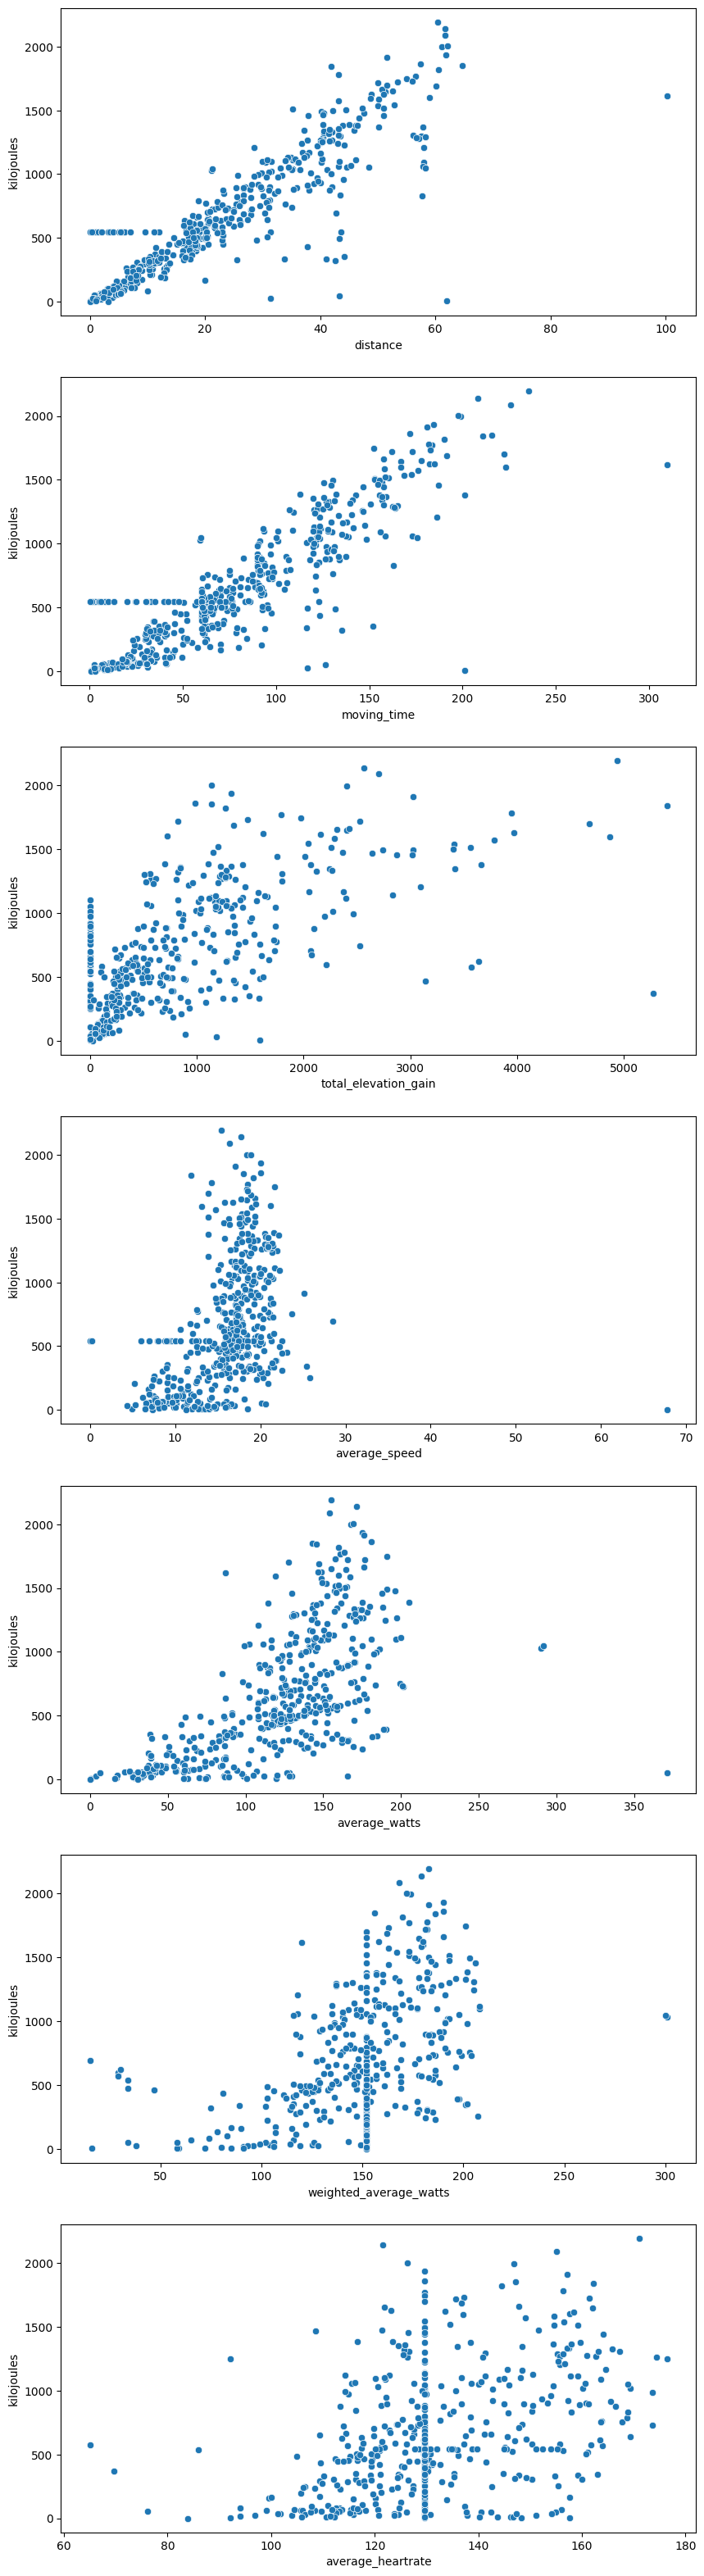

In [18]:
#Seems like the square root transformation yields better results for both distributions
#Let's see the outliers/bad data now
cols = ['distance', 'moving_time', 'total_elevation_gain', 'average_speed',
        'average_watts', 'weighted_average_watts', 'average_heartrate', 'average_cadence']
fig, ax = plt.subplots(7,1, figsize=(10,40))

flat_ax = ax.flatten()

for i, ax in enumerate(flat_ax):
    sns.scatterplot(x=df_backup[cols[i]], y=df_backup['kilojoules'], data=df_backup, ax=ax)
    
plt.show()

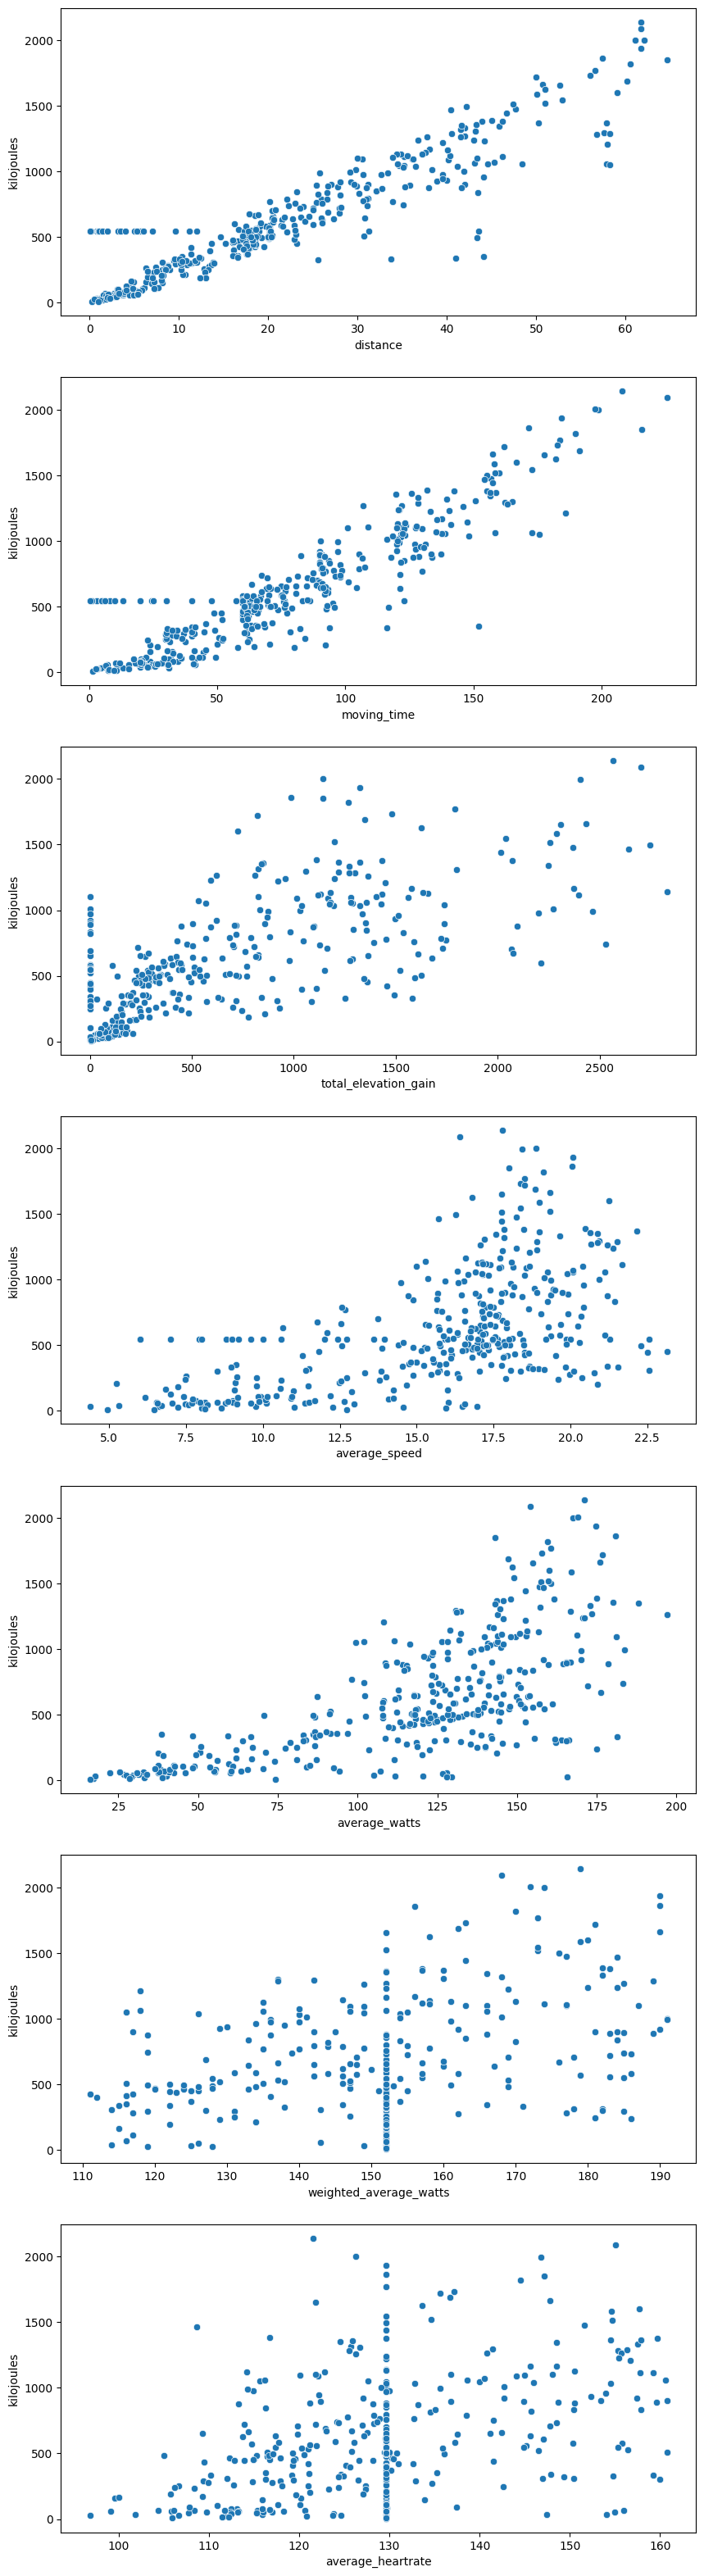

In [19]:
# We'll use the Interquartile Range (IQR) method to identify outliers. A data point is considered an outlier if it falls below Q1 - 1.5IQR or above Q3 + 1.5IQR.
import pandas as pd
import numpy as np

# Load the data
data = df_backup

# Define columns to check for outliers
outlier_columns = ['distance', 'moving_time', 'total_elevation_gain', 'average_speed', 'average_watts', 'weighted_average_watts', 'average_heartrate']

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data_no_outliers = remove_outliers(data, outlier_columns)

cols = ['distance', 'moving_time', 'total_elevation_gain', 'average_speed',
        'average_watts', 'weighted_average_watts', 'average_heartrate']
fig, ax = plt.subplots(7,1, figsize=(10,40))

flat_ax = ax.flatten()

for i, ax in enumerate(flat_ax):
    sns.scatterplot(x=data_no_outliers[cols[i]], y=data_no_outliers['kilojoules'], data=data_no_outliers, ax=ax)
    
plt.show()


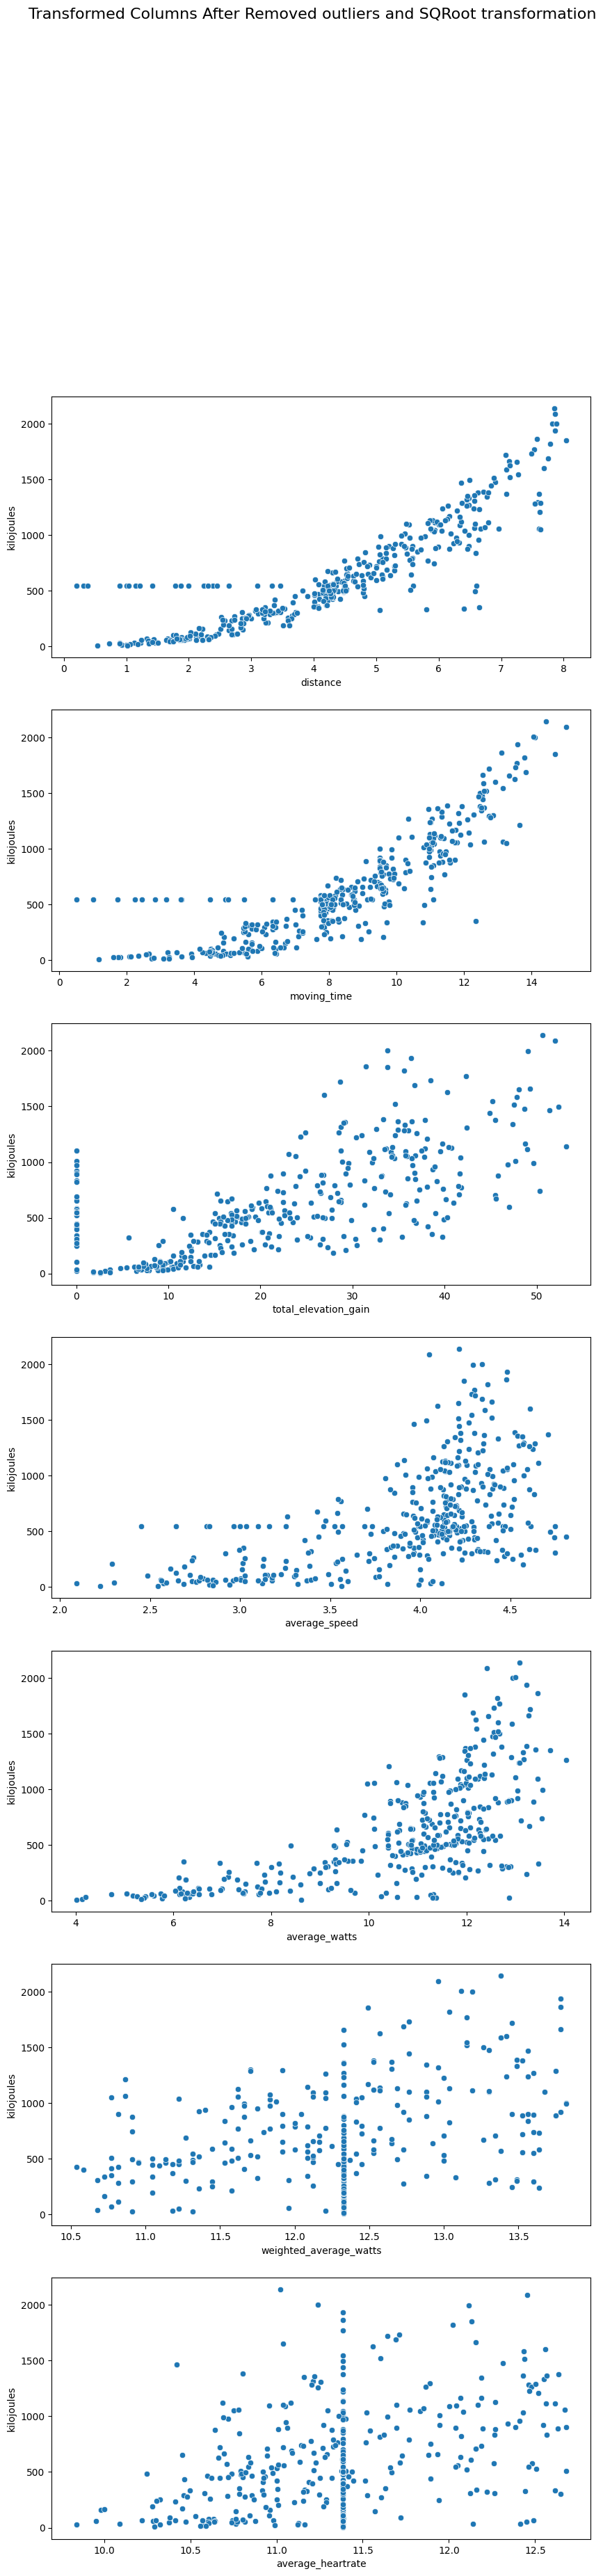

780


In [20]:
def sqrt_transform(df, columns):
    for col in columns:
        df[col] = np.sqrt(df[col])
    return df

data_transformed = sqrt_transform(data_no_outliers.copy(), outlier_columns)


cols = ['distance', 'moving_time', 'total_elevation_gain', 'average_speed',
        'average_watts', 'weighted_average_watts', 'average_heartrate']
fig, ax = plt.subplots(7,1, figsize=(10,40))

flat_ax = ax.flatten()
fig.suptitle('Transformed Columns After Removed outliers and SQRoot transformation', fontsize=16, y=1.02)

for i, ax in enumerate(flat_ax):
    sns.scatterplot(x=data_transformed[cols[i]], y=data_transformed['kilojoules'], data=data_transformed, ax=ax)
    
plt.show()

print(len(data_transformed))  

<Axes: >

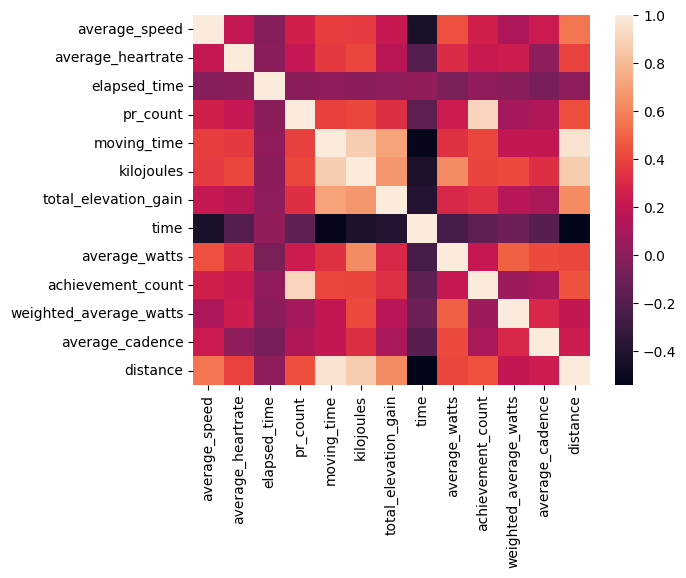

In [21]:
sns.heatmap(df_backup.select_dtypes(include=np.number).corr())


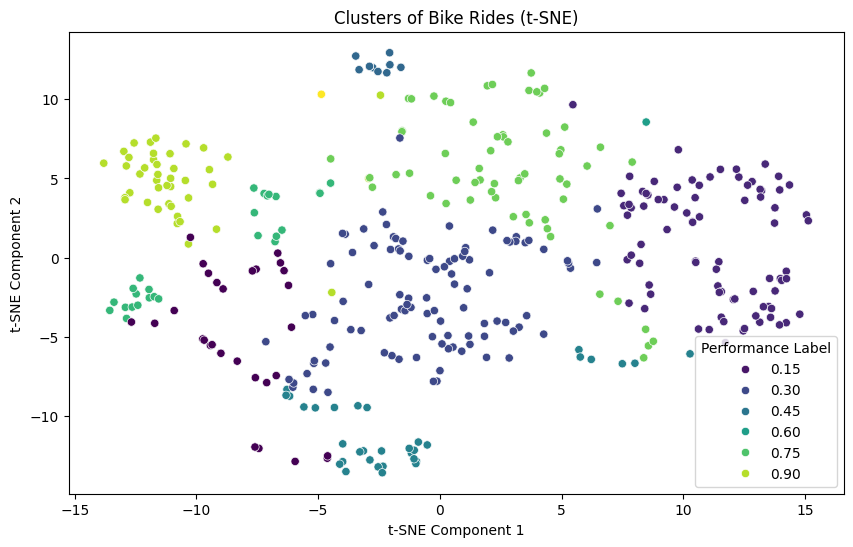

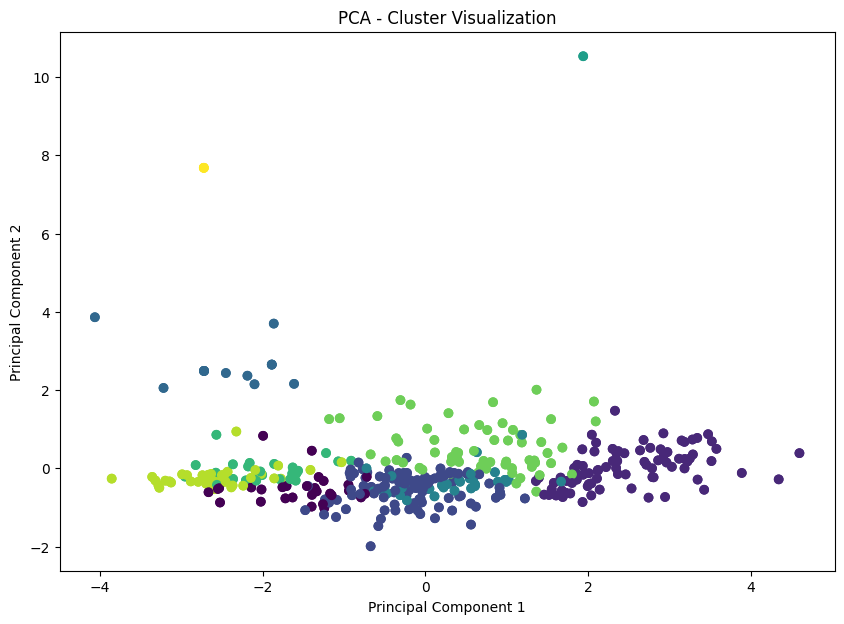

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the data
data = data_transformed

# Select relevant columns for clustering
features = ['average_heartrate', 'kilojoules', 'average_cadence', 'total_elevation_gain', 'average_speed', 'moving_time', 'elapsed_time']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Get the cluster labels
data['cluster'] = kmeans.labels_

# Create a mapping from cluster number to label value
cluster_mapping = {i: (i + 1) / 10 for i in range(10)}

# Map the cluster labels to values between 0.1 and 1
data['performance_label'] = data['cluster'].map(cluster_mapping)

# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE components to the dataframe for plotting
data['tsne1'] = X_tsne[:, 0]
data['tsne2'] = X_tsne[:, 1]

# Plot the clusters using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='performance_label', data=data, palette='viridis')
plt.title('Clusters of Bike Rides (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Performance Label', loc='best')
plt.show()



pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['performance_label'])
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#ADDING THE LABELS TO THE ORIGINAL DATASET
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('dataset.csv')

data['performance_label'] = data_transformed['performance_label']

# Save the modified dataset to a new CSV file
modified_data_path = 'dataset_with_labels.csv'
data.to_csv(modified_data_path, index=False)

dataset_with_labels = 'dataset_with_labels.csv'
data.to_csv(dataset_with_labels, index=False)


In [ ]:
# Count the number of rows with null values in the "performance_label" column
null_count = data['performance_label'].isnull().sum()

# Print the count
print("Number of rows with null values in 'performance_label' column:", null_count)

#due to the fact that there are roughly 260 rows that have null on the performance_label column, because we earlier removed the outliers, we will remove them


data = data.dropna(subset=['performance_label'])

modified_data_path = 'dataset_with_labels_cleaned.csv'
data.to_csv(modified_data_path, index=False)



Number of rows with null values in 'performance_label' column: 0
